In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, roc_auc_score, f1_score, recall_score, confusion_matrix)
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rlope\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
data = pd.read_csv('fake_news_train.csv')

In [5]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
data.shape

(20800, 5)

In [7]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
data.loc[data.isna().any(axis=1)]

,id,title,author,text,label
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
20,20,News: Hope For The GOP: A Nude Paul Ryan Has J...,NaN,Email \nSince Donald Trump entered the electio...,1
23,23,Massachusetts Cop’s Wife Busted for Pinning Fa...,NaN,Massachusetts Cop’s Wife Busted for Pinning Fa...,1
31,31,Israel is Becoming Pivotal to China’s Mid-East...,NaN,Country: Israel While China is silently playin...,1
...,...,...,...,...,...
20745,20745,Thomas Frank Explores Whether Hillary Clinton ...,NaN,Thomas Frank Explores Whether Hillary Clinton ...,1
20768,20768,Osama bin Laden’s older brother rents out luxu...,NaN,Osama bin Laden’s older brother rents out luxu...,1
20771,20771,NaN,Letsbereal,DYN's Statement on Last Week's Botnet Attack h...,1
20772,20772,NaN,beersession,Kinda reminds me of when Carter gave away the ...,1


In [9]:
data = data.fillna('')

In [10]:
X = data.drop('label', axis=1)
y = data['label']

In [11]:
data['content_title_author'] = data['author'] + ' ' + data['title']

In [12]:
port_stem = PorterStemmer()

In [13]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [14]:
data['stem_title_author'] = data['content_title_author'].apply(stemming)

In [15]:
data.head()

,id,title,author,text,label,content_title_author,stem_title_author
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,darrel lucu hous dem aid even see comey letter...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...",daniel j flynn flynn hillari clinton big woman...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,consortiumnew com truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,jessica purkiss civilian kill singl us airstri...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,howard portnoy iranian woman jail fiction unpu...


In [16]:
print(data['stem_title_author'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: stem_title_author, Length: 20800, dtype: object


In [17]:
X = data['stem_title_author'].values
y = data['label'].values

In [18]:
print(X, X.shape, y, y.shape)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv'] (20800,) [1 0 1 ... 0 1 1] (20800,)


In [19]:
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14560, 17128), (6240, 17128), (14560,), (6240,))

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
model = LogisticRegression()
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [24]:
param_dist = {
    'max_iter': [50, 100, 150, 200]
}

In [25]:
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=4, scoring='accuracy', cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=4, n_jobs=-1,
                   param_distributions={'max_iter': [50, 100, 150, 200]},
                   scoring='accuracy')

In [26]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

In [27]:
best_params, best_estimator

({'max_iter': 100}, LogisticRegression())

In [28]:
results = []

for thres in np.arange(0.05, 1, 0.05):
    y_pred_proba = (best_estimator.predict_proba(X_test)[:, 1]>thres)
    prec = precision_score(y_test, y_pred_proba)
    rec = recall_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred_proba)
    acc = accuracy_score(y_test, y_pred_proba)

    results.append((thres, prec, rec, f1, acc))

In [29]:
results_df = pd.DataFrame(results, columns=["thres", "precision", "recall", "f1", "accuracy"])
results_df

,thres,precision,recall,f1,accuracy
0,0.05,0.633137,0.999360,0.775171,0.709776
1,0.10,0.763093,0.998079,0.864910,0.843910
2,0.15,0.826306,0.997439,0.903843,0.893750
3,0.20,0.855809,0.997439,0.921212,0.914583
4,0.25,0.874719,0.996799,0.931777,0.926923
5,0.30,0.893257,0.996479,0.942049,0.938622
6,0.35,0.910981,0.995839,0.951522,0.949199
7,0.40,0.928849,0.994558,0.960581,0.959135
8,0.45,0.944563,0.992638,0.968004,0.967147
9,0.50,0.955008,0.991997,0.973151,0.972596


In [30]:
best_result = max(results, key=lambda x: x[4])
best_threshold, best_prec, best_rec, best_f1, best_acc = best_result

In [31]:
best_result

(0.6000000000000001,
 0.9772007599746675,
 0.9878361075544174,
 0.9824896529767589,
 0.9823717948717948)

In [32]:
final_prediction = (best_estimator.predict_proba(X_test)[:, 1] > best_threshold).astype(int)

In [33]:
print('Acurácia:', accuracy_score(y_test, final_prediction))
print('ROC_AUC:', roc_auc_score(y_test, final_prediction))

print()

print('Precisão:', precision_score(y_test, final_prediction))
print('F1:', f1_score(y_test, final_prediction))
print('Recall:', recall_score(y_test, final_prediction))

print()

confusion = confusion_matrix(y_test, final_prediction)
confusion

Acurácia: 0.9823717948717948
ROC_AUC: 0.9823647803497376

Precisão: 0.9772007599746675
F1: 0.9824896529767589
Recall: 0.9878361075544174



array([[3044,   72],
       [  38, 3086]], dtype=int64)

In [34]:
cols = []
for i in set(data.iloc[:, 4].values):
    cols.append(i)
print(cols)

[0, 1]


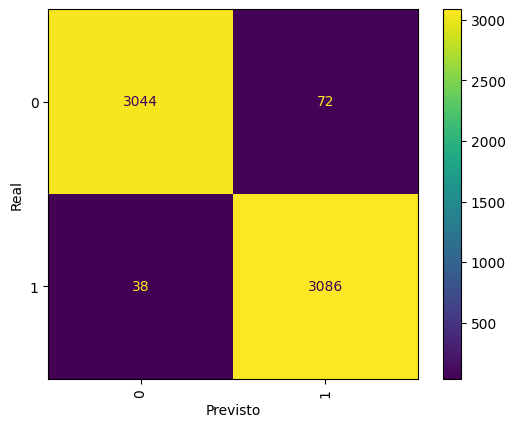

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd_obj = ConfusionMatrixDisplay(confusion, display_labels=sorted(cols))
cmd_obj.plot(xticks_rotation = "vertical")
cmd_obj.ax_.set(
                xlabel='Previsto',
                ylabel='Real')
plt.show()

In [36]:
fake_news_test = pd.read_csv('fake_news_test.csv')

In [37]:
fake_news_test

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


In [38]:
def processing(fake_data):
    fake_data = fake_data.fillna('')
    fake_data['content_title_author'] = fake_data['author'] + ' ' + fake_data['title']
    
    return fake_data

In [39]:
fake_news_test = processing(fake_news_test)

In [40]:
fake_news_test['stem_title_author'] = fake_news_test['content_title_author'].apply(stemming)
data.head()

,id,title,author,text,label,content_title_author,stem_title_author
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,darrel lucu hous dem aid even see comey letter...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...",daniel j flynn flynn hillari clinton big woman...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,consortiumnew com truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,jessica purkiss civilian kill singl us airstri...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,howard portnoy iranian woman jail fiction unpu...


In [41]:
X_test_data = fake_news_test['stem_title_author'].values

In [42]:
X_test_data

array(['david streitfeld specter trump loosen tongu purs string silicon valley new york time',
       'russian warship readi strike terrorist near aleppo',
       'common dream nodapl nativ american leader vow stay winter file lawsuit polic',
       ..., 'mike mcphate california today exactli sushi new york time',
       'us marin deploy russian border norway',
       'teddi wayn awkward sex onscreen new york time'], dtype=object)

In [43]:
X_test_data = vector.transform(X_test_data)

In [44]:
test_prediction = (best_estimator.predict_proba(X_test_data)[:, 1] > best_threshold).astype(int)

In [45]:
submissao = pd.Series(index=fake_news_test['id'].values, data=test_prediction)

In [46]:
submissao = submissao.reset_index().rename(columns={'index': 'id', 0: 'label'})

In [47]:
submissao.to_csv('baseline.csv', index=False)

In [48]:
pd.read_csv('baseline.csv')

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1
...,...,...
5195,25995,0
5196,25996,0
5197,25997,0
5198,25998,1
